## Attention and Transformers
- Encoder and decoder are stacked RNN/LSTM cells
- what is the bottleneck problem and the limitations of the RNNs?
  - RNNs cannot encode the input information from all the input timesteps. RNNs tend to forget information from the timesteps that are far behind.
  - Vanishing gradient problem
- Attention
  - prev the context vector z had access to all parts of the input sequence instead of just the last one?
  - **A notion of memory gained from attending over multiple inputs through time.**

#  attention_net() -> calculate the eij -> softmax layer (alpha_ij) -> z_i = 


y_t decoder state,at timestemp t -> ,dim(y_t) -> di

y_t provides a context for what the model has already generated and what it needs next, 

h_i encoder hidden state(or output) at ith input token -> , dim(h_i) -> 

attention(y_t,h_i) = v_a*tanh(W_a[y_t;h_i]) 
attention(y_t,h_i) = softmax(y_t.W_a.h_i)

In [2]:
# implement attention as a stacked RNN/LSTM layer.
# attention(y_t,h_i) = v_a*tanh(W_a[y_t;h_i]) 

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

seed = 172
torch.manual_seed(seed)


class Attention(nn.Module):
    def __init__(self, y_dim: int, h_dim: int):
        super().__init__()
        #1. Define the vector dimensions and the trainable parameters
        self.W = nn.Parameter(torch.FloatTensor(y_dim,h_dim))
        nn.init.xavier_uniform_(self.W)
        #self.layer_norm = nn.LayerNorm(h_dim)
        # define layer normalization

    def forward(self,
                y: torch.Tensor, # y.size() = (1, y_dim)
                h: torch.Tensor # h.size() = (1, h_dim)
                ):
        #2. Define the forward pass
        score = torch.matmul(torch.matmul(y,self.W), h.T)
        z = F.softmax(score,dim=0)
        return z, torch.matmul(z,h)

Action Item
    -[ ] : View self-attention as a probability score matrix.
Think Deeper: 
    - How viewing self attention as a weighted graph can help us ?

In [24]:
y.shape

torch.Size([1, 50])

C:\Users\pantm\AppData\Local\Temp\ipykernel_25376\537283677.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  embedding =  torch.tensor([word_vec.wv[word] for word in words]) # size: 26X50


Embedding for 'understand': tensor([[ 8.0539e-03,  8.6949e-03,  1.9915e-02, -8.9475e-03, -2.7785e-03,
         -1.4635e-02, -1.9396e-02, -1.8161e-02, -2.0455e-03, -1.3007e-02,
          9.6995e-03, -1.2328e-02,  5.0384e-03,  1.4789e-03, -6.7843e-03,
         -1.9584e-03,  1.9958e-02,  1.8292e-02, -8.9237e-03,  1.8166e-02,
         -1.1284e-02,  1.1862e-02, -6.1944e-03,  6.8635e-03,  6.0345e-03,
          1.3801e-02, -4.7478e-03,  1.7550e-02,  1.5179e-02, -1.9095e-02,
         -1.6016e-02, -1.5276e-02,  5.8465e-03, -5.5894e-03, -1.3859e-02,
         -1.6257e-02,  1.6618e-02,  3.9810e-03, -1.8656e-02, -9.5854e-03,
          6.2735e-03, -9.4264e-03,  1.0562e-02, -8.4669e-03,  5.2836e-03,
         -1.6091e-02,  1.2420e-02,  9.6378e-03,  1.5744e-03,  6.0269e-03],
        [-1.6312e-02,  8.9858e-03, -8.2747e-03,  1.6515e-03,  1.6998e-02,
         -8.9193e-03,  9.0414e-03, -1.3570e-02, -7.0978e-03,  1.8803e-02,
         -3.1611e-03,  6.4489e-04, -8.2848e-03, -1.5370e-02, -3.0138e-03,
         

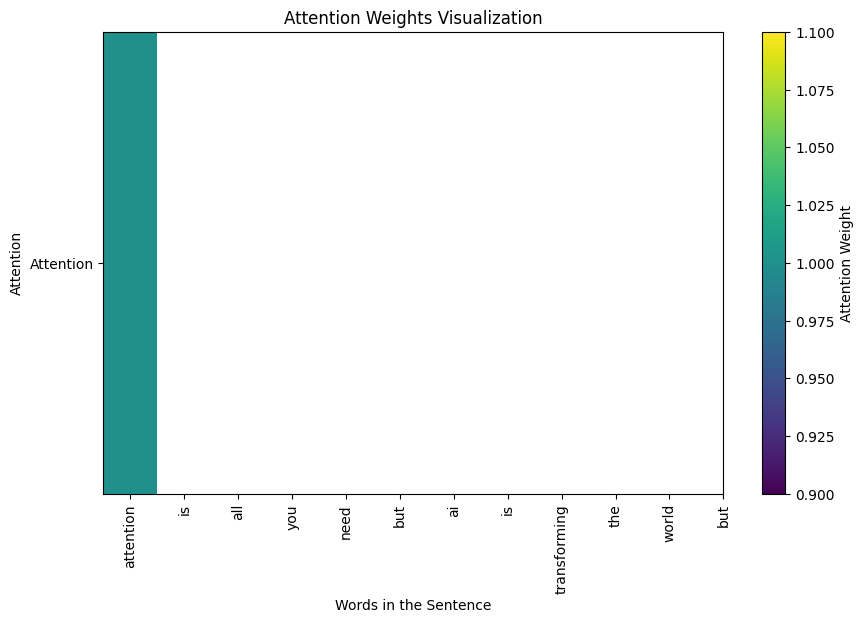

Attention Weights: tensor([[1.]], grad_fn=<SoftmaxBackward0>)
Attended Result: tensor([[-0.6206,  0.4675,  0.5308,  2.7056,  1.8922, -1.6383, -1.0470, -0.0353,
          0.4265,  0.4978,  2.0777, -0.2910,  0.4031,  0.6930,  2.0563,  0.0927,
          0.5966,  0.1398,  0.8827, -0.2191, -0.9471,  0.2801,  0.2945,  0.2547,
          0.4069,  0.5527, -1.1721,  0.9245, -1.7937,  0.1477,  0.8181, -1.1203,
         -1.2857,  0.0957, -0.1796,  1.7132, -0.2638, -0.8542, -1.4580,  1.4391,
          1.4463, -1.0590, -0.2117,  1.5961,  0.5070, -0.3922,  2.1680,  1.7280,
         -0.6770,  1.2777]], grad_fn=<MmBackward0>)


In [3]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
sentence = " attention is all you need but ai is transforming the world but" 
# how do I create the word embeddings
words = sentence.lower().split()#word_tokenize(sentence)
text_data=[words]
word_vec = Word2Vec(text_data,vector_size=50, window=5,min_count=1,workers=4)
embedding =  torch.tensor([word_vec.wv[word] for word in words]) # size: 26X50
#word_vec.wv.index_to_key#word_vec.wv["understand"]  # Retrieve the embedding for "understand"
print("Embedding for 'understand':", embedding)

h = torch.randn(1,50)
model = Attention(y_dim=50,h_dim=50)
y = embedding.mean(dim=0).unsqueeze(0) 
attention_wt,attended_result = model(y,h)

plt.figure(figsize=(10, 6))
plt.imshow(attention_wt.detach().numpy(), cmap="viridis", aspect="auto")
plt.colorbar(label="Attention Weight")
plt.xticks(range(len(words)), words, rotation=90)
plt.yticks([0], ["Attention"])
plt.title("Attention Weights Visualization")
plt.xlabel("Words in the Sentence")
plt.ylabel("Attention")
plt.show()

print("Attention Weights:", attention_wt)
print("Attended Result:", attended_result)



## Transformer
- representation of the input sentence 
  - into set because the order is irrelevant and input set X = [x1,x2,x3,x4, ..,xn] xi are known as the tokens.
  - after this we have to create word embeddings, why?
    - continuously-valued vectors in a low dimensional space
    - notion of distance
    - semantics relationship is captured
  - while tokenization we lose the notion of the order.
    - positional encoding -> small constants added to the word embedding vector before first self attention layer
    - sinusoidal function for the positional encoding, to pay attention to a particular wavelength
- feature based attention: K, Q and V
  - we use the keys to define the attention weights to look at the data and the values as the information that we will actually get.
- Self Attention
  - correlation between the different words of the input indicating
    - syntactic
    - contextual structure of the sentence

## Self Attention Theory
- calculates the importance of weight of each words in the sentence corresponding to every other word.
- $X \in \mathbb{R}^{N \times d_k}$ with the three different weight matrices, $W_Q, W_K and W_V \in \mathbb{R}^{d_k \times d_model}$
- $$ \text{Attention}(Q, K, V) = \text{Softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V  $$

In [ ]:
import math
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self,q,k,v,mask,dropout):
        d_k = q.size(-1) # it gives the last dimension of q
        scores = torch.matmul(q,k.transpose(-2,-1))/math.sqrt(d_k) # why in transpose we have -2,-1 
        # transpose of the second last dimension to the last dimension.
        if mask is not None:
            scores = scores.masked_fill(mask.eq(0),-1e9) # why we are doing the mask over here?
        p_attn=F.softmax(scores,dim=-1)
        if dropout is not None:
            p_attn = dropout(p_attn)
        return torch.matmul(p_attn,v),p_attn 
        

In [6]:
import torch
import torch.nn.functional as F

def attention(Q, K, V):
    """
    Performs attention mechanism on three input matrices.

    Args:
        Q: Query matrix with shape (B, M, D).
        K: Key matrix with shape (B, N, D).
        V: Value matrix with shape (B, N, D).

    Returns:
        output: Weighted sum of the values based on
            attention scores, with shape (B, M, D).
        attention_weights: Attention weights with
            shape (B, M, N).
    """

    # Calculate attention scores with scaling by sqrt(d_k)
    d_k = Q.size(-1)
    scaler = torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
    attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / scaler

    # Apply softmax to get attention weights
    attention_weights = F.softmax(attention_scores, dim=-1)

    # Multiply weights with values and sum
    output = torch.matmul(attention_weights, V)

    return output, attention_weights

# Example Usage:
batch_size = 2
num_queries = 3
num_key_value_pairs = 4
feature_dimension = 5

Q = torch.randn(batch_size, num_queries, feature_dimension)
K = torch.randn(batch_size, num_key_value_pairs, feature_dimension)
V = torch.randn(batch_size, num_key_value_pairs, feature_dimension)

output, attention_weights = attention(Q, K, V)

print("Output shape:", output.shape)
print("Attention weights shape:", attention_weights.shape)


Output shape: torch.Size([2, 3, 5])
Attention weights shape: torch.Size([2, 3, 4])


In [12]:
print(K)

tensor([[[ 1.5041, -1.3989, -0.5283, -1.2594, -1.8863],
         [ 0.7623, -1.7288,  1.6065,  0.1568, -0.7953],
         [-0.1463,  0.7103, -1.2401,  0.0179,  2.0648],
         [-0.2563, -0.2149,  0.7720,  2.0352, -0.1620]],

        [[ 1.2691,  0.9128,  0.9141, -0.7811,  0.6648],
         [-0.0414,  1.5623, -0.4181, -0.8042, -1.0611],
         [ 0.8960, -1.4531, -0.2441, -1.6687,  0.7469],
         [-0.2928,  0.8000,  0.3180,  1.2759, -0.0411]]])


In [13]:
K.transpose(-2,-1).shape

torch.Size([2, 5, 4])

## Multi Head Self Attention
 - we run through the attention mechanism several times
 - what is a head?
   -  \text{head}_i = \text{Attention}(Q_i, K_i, V_i)
 - what is a multi head?    
   - MultiHead(Q,K,V) = Concat(head1,head2, ... head_h) W^o
 - Now we can attend to different parts of the sequence differently each time
   - the model can capture positional information because each head will attend to different segments of the input.

The basic three steps of the code are:
- Compute the linear projections into keys, queries, and values.
- Apply attention to all the projected vectors.
- Concatenate them and apply a final linear.

In [ ]:
# criteria for choosing the num_heads
from copy import deepcopy
class MultiHeadAttention(nn.Module):
    def __init__(self,num_heads,model_dim,dropout):
        super().__init__()
        self.d_k = model_dim // num_heads
        self.h = num_heads
        self.linears = nn.ModuleList(
            [deepcopy(nn.Linear(model_dim,model_dim)) for _ in range(4)]
        )
        self.scaled_dotp_attn = ScaledDotProductAttention()
        self.attn = None 
        self.dropout = nn.Dropout(dropout)
        
    
    def forward(self,query,key,value,mask):
        if mask is not None:
            mask = mask.unsqueeze(1).unsqueeze(1)
            
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.018551797866821318..1.0000000532150268].


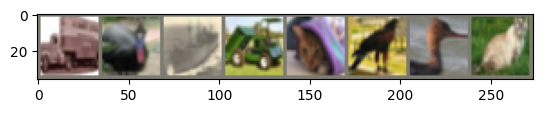

truck bird  ship  truck cat   bird  bird  cat  


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np

def prepare_data(batch_size=4, num_workers=min(2, os.cpu_count()), train_sample_size=None, test_sample_size=None):
    train_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((32, 32)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomResizedCrop((32, 32), scale=(0.8, 1.0), ratio=(0.75, 1.33), interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
    ])

    trainset = torchvision.datasets.CIFAR10(root=os.path.expanduser('~/.torchvision'), train=True, download=True, transform=train_transform)
    if train_sample_size is not None:
        indices = torch.randperm(len(trainset))[:train_sample_size].tolist()
        trainset = torch.utils.data.Subset(trainset, indices)

    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((32, 32)),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
    ])

    testset = torchvision.datasets.CIFAR10(root=os.path.expanduser('~/.torchvision'), train=False, download=True, transform=test_transform)
    if test_sample_size is not None:
        indices = torch.randperm(len(testset))[:test_sample_size].tolist()
        testset = torch.utils.data.Subset(testset, indices)

    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    return trainloader, testloader, classes

batch_size = 8
trainloader, testloader, classes = prepare_data(batch_size, 2)

def imshow(img):
    """Correctly unnormalizes and displays an image"""
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2470, 0.2435, 0.2616])
    img = img.numpy().transpose((1, 2, 0))  # Convert to HWC
    img = img * std + mean  # Correct normalization
    plt.imshow(img)
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels (handling possible out-of-index errors)
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(min(batch_size, len(labels)))))

In [ ]:
import torch.nn as nn
class PatchEmbeddings(nn.Module):
    """
    Convert the image into patches and then project them into a vector space.
    """

    def __init__(self, config):
        super().__init__()
        self.image_size = config["image_size"]
        self.patch_size = config["patch_size"]
        self.num_patches = (self.image_size // self.patch_size) ** 2
        self.projection = nn.Conv2d(config["num_channels"], config["hidden_size"], kernel_size=self.patch_size, stride=self.patch_size)

    def forward(self, x):
        # (batch_size, num_channels, image_size, image_size) -> (batch_size, num_patches, hidden_size)
        x = self.projection(x)
        x = x.flatten(2).transpose(1, 2)
        return x



config = {
    "patch_size": 4,  # Input image size: 32x32 -> 8x8 patches
    "hidden_size": 48,
    "num_hidden_layers": 4,
    "num_attention_heads": 4,
    "intermediate_size": 4 * 48, # 4 * hidden_size
    "hidden_dropout_prob": 0.0,
    "attention_probs_dropout_prob": 0.0,
    "initializer_range": 0.02,
    "image_size": 32,
    "num_classes": 10, # num_classes of CIFAR10
    "num_channels": 3,
    "qkv_bias": True,
    "use_faster_attention": True,
}
embedding  = PatchEmbeddings(config)


# how do i prepare the input to the CIFARdatase and provide it to the PatchEmbeddings



In [18]:
# Get a single image
dataiter = iter(trainloader)
image, label = next(dataiter)  # Shape: [1, 3, 32, 32]

# Pass through PatchEmbeddings
config = {
    "image_size": 32,
    "patch_size": 4,
    "num_channels": 3,
    "hidden_size": 128
}

patch_embedding_layer = PatchEmbeddings(config)
patch_embeddings = patch_embedding_layer(image)  # Shape: [1, num_patches, hidden_size]

# Reshape for visualization
num_patches = (config["image_size"] // config["patch_size"]) ** 2
patch_dim = config["hidden_size"]
patch_embeddings_reshaped = patch_embeddings.view(num_patches, patch_dim).detach().numpy()

# Normalize embeddings for visualization
patch_embeddings_reshaped = (patch_embeddings_reshaped - patch_embeddings_reshaped.min()) / (patch_embeddings_reshaped.max() - patch_embeddings_reshaped.min())

# Plot embeddings
plt.figure(figsize=(6, 6))
plt.imshow(patch_embeddings_reshaped, cmap="viridis", aspect="auto")
plt.colorbar()
plt.title(f"Patch Embeddings Visualization for Class: {trainset.classes[label.item()]}")
plt.show()

RuntimeError: shape '[64, 128]' is invalid for input of size 65536

In [15]:
help(trainloader)

Help on DataLoader in module torch.utils.data.dataloader object:

class DataLoader(typing.Generic)
 |  DataLoader(dataset: torch.utils.data.dataset.Dataset[+_T_co], batch_size: Optional[int] = 1, shuffle: Optional[bool] = None, sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None, batch_sampler: Union[torch.utils.data.sampler.Sampler[List], Iterable[List], NoneType] = None, num_workers: int = 0, collate_fn: Optional[Callable[[List[~_T]], Any]] = None, pin_memory: bool = False, drop_last: bool = False, timeout: float = 0, worker_init_fn: Optional[Callable[[int], NoneType]] = None, multiprocessing_context=None, generator=None, *, prefetch_factor: Optional[int] = None, persistent_workers: bool = False, pin_memory_device: str = '', in_order: bool = True)
 |  
 |  Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with 